In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
(X_train , y_train) , (X_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()

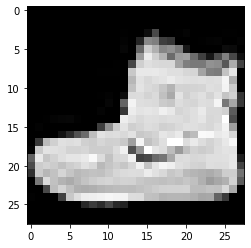

In [3]:
plt.imshow(X_train[0] , cmap ='gray')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

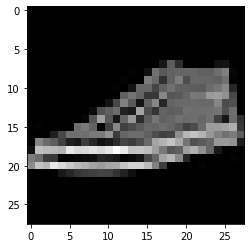

In [8]:
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap='gray')

In [9]:
label= y_train[i]
label

7

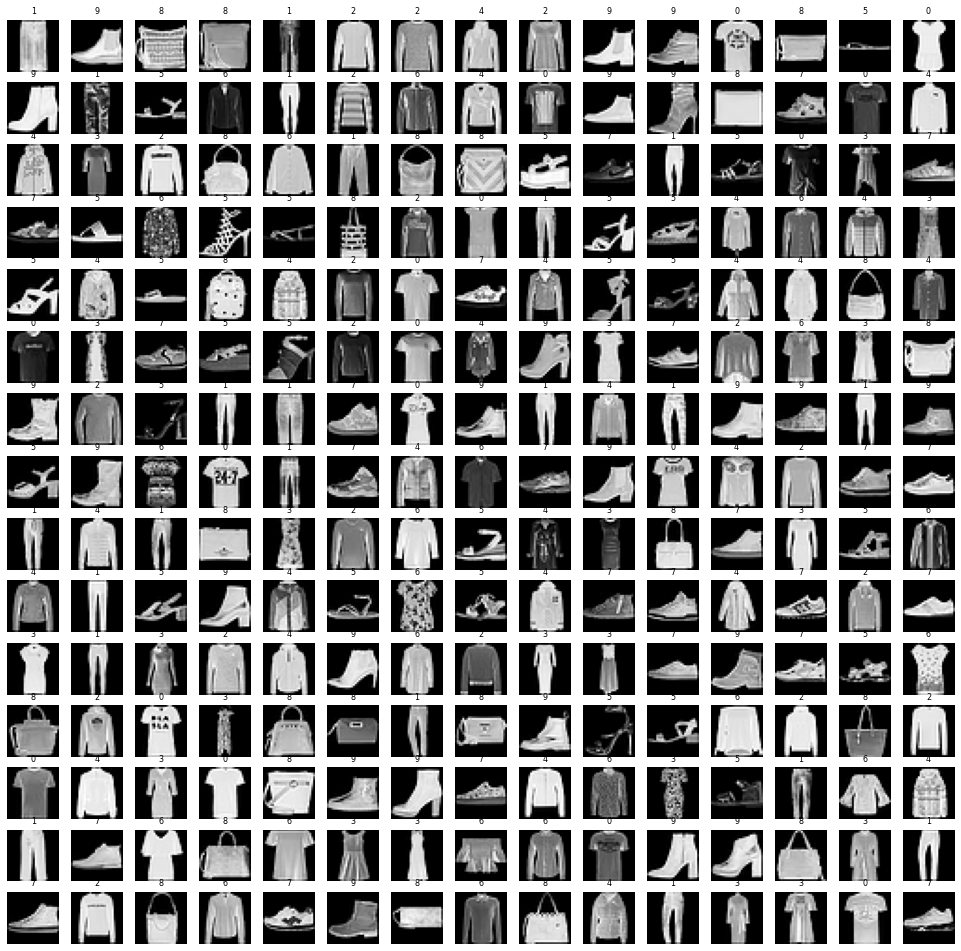

In [10]:
W_grid = 15
L_grid = 15

fig ,axes = plt.subplots(L_grid,W_grid ,  figsize =(17,17))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index] , cmap='gray')
    axes[i].set_title(y_train[index] , fontsize = 8)
    axes[i].axis("off")
    


In [11]:
X_train = X_train / 255
X_test = X_test / 255


In [12]:
noise_factor = 0.3
noise_dataset_train = []

for img in X_train:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image , 0 ,1)
    noise_dataset_train.append(noisy_image)
    

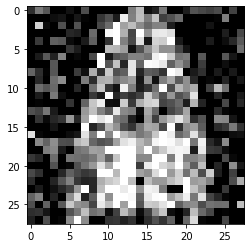

In [13]:
plt.imshow(noise_dataset_train[22], cmap =  'gray')

In [14]:
noise_factor = 0.3
noise_dataset_test = []

for img in X_test:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image , 0 ,1)
    noise_dataset_test.append(noisy_image)
    

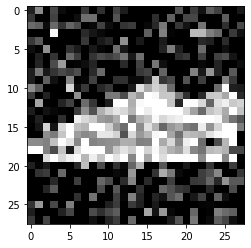

In [15]:
plt.imshow(noise_dataset_test[22], cmap =  'gray')

In [16]:
noise_dataset_train = np.array(noise_dataset_train)
noise_dataset_test = np.array(noise_dataset_test)

In [17]:
autoencoder  = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 16 , kernel_size = 3 , strides = 1 , padding='same' , input_shape =(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size = 3 , strides = 2 , padding='same' ))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size = 1 , strides = 2 , padding='same' ))

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16 , kernel_size = 3 , strides = 2 , padding='same' ))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1 , kernel_size = 3 , strides = 2 , padding='same', activation = 'sigmoid' ))


In [18]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr =0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           72        
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 2,705
Trainable params: 2,705
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.fit(noise_dataset_train.reshape(-1,28,28,1),
               X_train.reshape(-1,28,28,1),
               epochs = 15,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1)))

Epoch 1/15
300/300 [==============================] - 15s 50ms/step - loss: 0.3974 - val_loss: 0.3303
Epoch 2/15
300/300 [==============================] - 16s 54ms/step - loss: 0.3200 - val_loss: 0.3179
Epoch 3/15
300/300 [==============================] - 15s 51ms/step - loss: 0.3139 - val_loss: 0.3154
Epoch 4/15
300/300 [==============================] - 13s 44ms/step - loss: 0.3128 - val_loss: 0.3146
Epoch 5/15
300/300 [==============================] - 13s 44ms/step - loss: 0.3115 - val_loss: 0.3131
Epoch 6/15
300/300 [==============================] - 14s 47ms/step - loss: 0.3104 - val_loss: 0.3124
Epoch 7/15
300/300 [==============================] - 14s 45ms/step - loss: 0.3099 - val_loss: 0.3121
Epoch 8/15
300/300 [==============================] - 13s 44ms/step - loss: 0.3097 - val_loss: 0.3119
Epoch 9/15
300/300 [==============================] - 14s 45ms/step - loss: 0.3095 - val_loss: 0.3117
Epoch 10/15
300/300 [==============================] - 15s 49ms/step - loss: 0.309

In [21]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print("Test Accuracy : {:.3f}".format(evaluation))

313/313 [==============================] - 1s 4ms/step - loss: 0.3109
Test Accuracy : 0.311


In [23]:
pred = autoencoder.predict(noise_dataset_test[:10].reshape(-1,28,28,1))


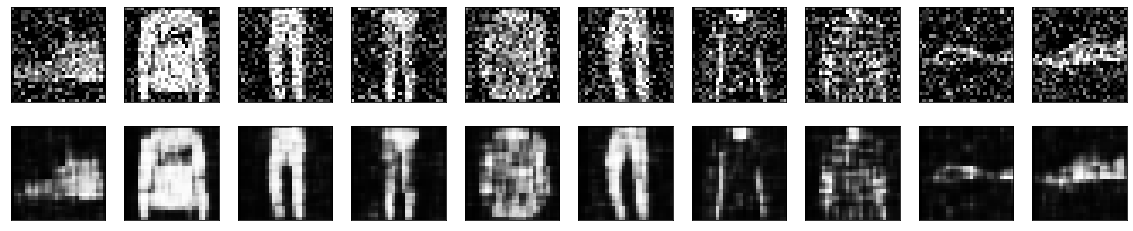

In [28]:
fig ,axes = plt.subplots(nrows = 2 ,ncols = 10 , sharex = True , sharey =True , figsize=(20,4))
for images  , row in zip([noise_dataset_test[:10],pred],axes):
    for img , ax in zip(images , row):
        ax.imshow(img.reshape((28,28)),cmap ='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        